# Monte Carlo multi-portfolio forecast engine


In [25]:
# Initial imports
import os
import requests
import pandas as pd
from pathlib import Path
#from dotenv import load_dotenv
#import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

## Part 1 - Load CSV data

In [2]:
AAPL_path = Path("../Data Collection Notebooks/asset_historical_prices/AAPL.csv")
AAPL = pd.read_csv(AAPL_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
AAPL.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [3]:
AMZN_path = Path("../Data Collection Notebooks/asset_historical_prices/AMZN.csv")
AMZN = pd.read_csv(AMZN_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
AMZN.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [4]:
TSLA_path = Path("../Data Collection Notebooks/asset_historical_prices/TSLA.csv")
TSLA = pd.read_csv(TSLA_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
TSLA.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [5]:
NVDA_path = Path("../Data Collection Notebooks/asset_historical_prices/NVDA.csv")
NVDA = pd.read_csv(NVDA_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
NVDA.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [6]:
META_path = Path("../Data Collection Notebooks/asset_historical_prices/META.csv")
META = pd.read_csv(META_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
META.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [7]:
GOOGL_path = Path("../Data Collection Notebooks/asset_historical_prices/GOOGL.csv")
GOOGL = pd.read_csv(GOOGL_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
GOOGL.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [8]:
MSFT_path = Path("../Data Collection Notebooks/asset_historical_prices/MSFT.csv")
MSFT = pd.read_csv(MSFT_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
MSFT.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [9]:
JPM_path = Path("../Data Collection Notebooks/asset_historical_prices/JPM.csv")
JPM = pd.read_csv(JPM_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
JPM.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [10]:
KO_path = Path("../Data Collection Notebooks/asset_historical_prices/KO.csv")
KO = pd.read_csv(KO_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
KO.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [11]:
PG_path = Path("../Data Collection Notebooks/asset_historical_prices/PG.csv")
PG = pd.read_csv(PG_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
PG.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [12]:
PEP_path = Path("../Data Collection Notebooks/asset_historical_prices/PEP.csv")
PEP = pd.read_csv(PEP_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
PEP.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [13]:
BTC_path = Path("../Data Collection Notebooks/asset_historical_prices/BTC-USD.csv")
BTC = pd.read_csv(BTC_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
BTC.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [14]:
ETH_path = Path("../Data Collection Notebooks/asset_historical_prices/ETH-USD.csv")
ETH = pd.read_csv(BTC_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
ETH.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [15]:
AGG_path = Path("../Data Collection Notebooks/bonds/AGG.csv")
AGG = pd.read_csv(BTC_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
AGG.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

## Part 2 - Gather user inputs and choose portfolio

In [49]:
age = int(input("What is your age?"))
stock_selection = int(input("Please select whether you would like portfolio consisting of aggressive, moderate or conservative performing stocks.  Select '1' for aggressive, '2' for moderate, and '3' for conservative:"))
investment_amount = int(input("How much do you want to invest?"))
investment_period = int(input("How many years do you want to invest?"))
stock_allocation = 110 - age
bond_allocation = 100 - stock_allocation - 5
crypto_allocation = 5

if stock_selection == 1:
    df_stock_data = pd.concat([AAPL,AMZN,TSLA,NVDA,META,BTC,ETH,AGG], axis=1, keys=['AAPL','AMZN','TSLA','NVDA','META','BTC','ETH','AGG'])
    df_stock_data = df_stock_data.dropna()
elif stock_selection == 2:
    df_stock_data = pd.concat([AAPL,AMZN,JPM,GOOGL,MSFT,BTC,ETH,AGG], axis=1, keys=['AAPL','AMZN','GOOGL','MSFT','JPM','BTC','ETH','AGG'])
    df_stock_data = df_stock_data.dropna()
elif stock_selection == 3:
    df_stock_data = pd.concat([AAPL,AMZN,KO,PG,PEP,BTC,ETH,AGG], axis=1, keys=['AAPL','AMZN','KO','PG','PEP','BTC','ETH','AGG'])
    df_stock_data = df_stock_data.dropna()
    
df_stock_data

What is your age? 30
Please select whether you would like portfolio consisting of aggressive, moderate or conservative performing stocks.  Select '1' for aggressive, '2' for moderate, and '3' for conservative: 1
How much do you want to invest? 10000
How many years do you want to invest? 10


AAPL                                                  \
                  open        high         low       close   adj close   
Date                                                                     
2014-09-17   25.317499   25.450001   25.147499   25.395000   22.760485   
2014-09-18   25.482500   25.587500   25.389999   25.447500   22.807531   
2014-09-19   25.572500   25.587500   25.125000   25.240000   22.621561   
2014-09-22   25.450001   25.535000   25.145000   25.264999   22.643967   
2014-09-23   25.150000   25.735001   25.135000   25.660000   22.997986   
...                ...         ...         ...         ...         ...   
2022-12-15  141.110001  141.800003  136.029999  136.500000  136.500000   
2022-12-16  136.690002  137.649994  133.729996  134.509995  134.509995   
2022-12-19  135.110001  135.199997  131.320007  132.369995  132.369995   
2022-12-20  131.389999  133.250000  129.889999  132.300003  132.300003   
2022-12-21  132.979996  136.800400  132.750000  135.449997  135.449997   

                              AMZN                                   ...  \
                 volume       open       high        low      close  ...   
Date                                                                 ...   
2014-09-17  243706000.0  16.388000  16.400000  16.076000  16.200001  ...   
2014-09-18  149197600.0  16.271999  16.355000  16.185499  16.250000  ...   
2014-09-19  283609600.0  16.379999  16.638000  16.278500  16.566000  ...   
2014-09-22  211153600.0  16.424500  16.474501  16.052999  16.225000  ...   
2014-09-23  253608800.0  16.122999  16.379999  16.062500  16.181499  ...   
...                 ...        ...        ...        ...        ...  ...   
2022-12-15   98931900.0  89.889999  89.970001  87.470001  88.449997  ...   
2022-12-16  160080100.0  88.269997  89.349998  86.730003  87.860001  ...   
2022-12-19   79592600.0  87.510002  87.629997  84.510002  84.919998  ...   
2022-12-20   77432800.0  85.330002  86.610001  84.330002  85.190002  ...   
2022-12-21   85593883.0  86.175003  87.224998  85.209999  86.769997  ...   

                     ETH                                            \
                     low         close     adj close        volume   
Date                                                                 
2014-09-17    452.421997    457.334015    457.334015  2.105680e+07   
2014-09-18    413.104004    424.440002    424.440002  3.448320e+07   
2014-09-19    384.532013    394.795990    394.795990  3.791970e+07   
2014-09-22    397.130005    402.152008    402.152008  2.412760e+07   
2014-09-23    396.196991    435.790985    435.790985  4.509950e+07   
...                  ...           ...           ...           ...   
2022-12-15  17322.589844  17364.865234  17364.865234  2.096445e+10   
2022-12-16  16584.701172  16647.484375  16647.484375  2.403161e+10   
2022-12-19  16398.136719  16439.679688  16439.679688  1.722107e+10   
2022-12-20  16427.867188  16906.304688  16906.304688  2.272210e+10   
2022-12-21  16756.583984  16789.761719  16789.761719  1.504357e+10   

                     AGG                                            \
                    open          high           low         close   
Date                                                                 
2014-09-17    465.864014    468.174011    452.421997    457.334015   
2014-09-18    456.859985    456.859985    413.104004    424.440002   
2014-09-19    424.102997    427.834991    384.532013    394.795990   
2014-09-22    399.100006    406.915985    397.130005    402.152008   
2014-09-23    402.092010    441.557007    396.196991    435.790985   
...                  ...           ...           ...           ...   
2022-12-15  17813.644531  17846.744141  17322.589844  17364.865234   
2022-12-16  17364.546875  17505.525391  16584.701172  16647.484375   
2022-12-19  16759.041016  16807.527344  16398.136719  16439.679688   
2022-12-20  16441.787109  17012.984375  16427.867188  16906.304688   
2022-12-21  16905.384766 

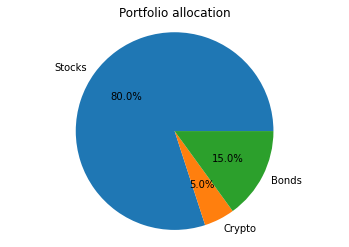

In [65]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Stocks', 'Crypto', 'Bonds'
sizes = [stock_allocation, crypto_allocation, bond_allocation]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
#        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Portfolio allocation")

plt.show().figure

## Part 3 - Monte Carlo Simulation

In [48]:
# Configuring a Monte Carlo simulation to forecast Y years of cumulative returns
# df_ticker is df_stock_data here
sim_returns = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [(stock_allocation/500), (stock_allocation/500),(stock_allocation/500),(stock_allocation/500),(stock_allocation/500),.025,.025,(bond_allocation/100)],
    num_simulation=100,
    num_trading_days=252*investment_period
)

sim_returns.portfolio_data.head() # Checking the simulation input data


AAPL                                              \
                 open       high        low      close  adj close   
Date                                                                
2014-09-17  25.317499  25.450001  25.147499  25.395000  22.760485   
2014-09-18  25.482500  25.587500  25.389999  25.447500  22.807531   
2014-09-19  25.572500  25.587500  25.125000  25.240000  22.621561   
2014-09-22  25.450001  25.535000  25.145000  25.264999  22.643967   
2014-09-23  25.150000  25.735001  25.135000  25.660000  22.997986   

                                           AMZN                        ...  \
                 volume daily_return       open       high        low  ...   
Date                                                                   ...   
2014-09-17  243706000.0          NaN  16.388000  16.400000  16.076000  ...   
2014-09-18  149197600.0     0.002067  16.271999  16.355000  16.185499  ...   
2014-09-19  283609600.0    -0.008154  16.379999  16.638000  16.278500  ...   
2014-09-22  211153600.0     0.000990  16.424500  16.474501  16.052999  ...   
2014-09-23  253608800.0     0.015634  16.122999  16.379999  16.062500  ...   

                   ETH                                  AGG              \
             adj close      volume daily_return        open        high   
Date                                                                      
2014-09-17  457.334015  21056800.0          NaN  465.864014  468.174011   
2014-09-18  424.440002  34483200.0    -0.071926  456.859985  456.859985   
2014-09-19  394.795990  37919700.0    -0.069843  424.102997  427.834991   
2014-09-22  402.152008  24127600.0     0.018632  399.100006  406.915985   
2014-09-23  435.790985  45099500.0     0.083647  402.092010  441.557007   

                                                                         
                   low       close   adj close      volume daily_return  
Date                                                                     
2014-09-17  452.421997  457.334015  457.334015  21056800.0          NaN  
2014-09-18  413.104004  424.440002  424.440002  34483200.0    -0.071926  
2014-09-19  384.532013  394.795990  394.795990  37919700.0    -0.069843  
2014-09-22  397.130005  402.152008  402.152008  24127600.0     0.018632  
2014-09-23  396.196991  435.790985  435.790985  45099500.0     0.083647  

[5 rows x 56 columns]

In [18]:
sim_returns.calc_cumulative_return() # Forecast cumulative returns

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000902,0.988209,1.004199,1.016384,1.007950,0.982385,0.994418,1.005383,1.007479,1.003267,...,0.992201,1.016304,1.011775,0.993609,1.009150,0.987412,0.986769,1.009754,1.001399,1.018063
2,1.033766,0.994020,1.031557,1.024695,1.032973,0.976924,0.982266,1.020274,1.000299,0.998377,...,1.003428,1.028050,1.002871,0.991063,0.991563,0.999196,1.006447,0.988842,0.980488,1.056001
3,1.047749,0.990207,1.057909,1.017980,1.035416,0.976877,0.986659,1.031713,0.996065,1.016288,...,1.027015,1.038941,0.996847,0.986594,0.959141,1.023102,1.027047,1.018785,0.991534,1.035109
4,1.035776,0.974242,1.072621,1.008149,0.998150,0.981012,0.994499,1.055425,1.025250,1.024566,...,1.044240,1.046161,1.000163,0.975985,0.963778,1.024525,1.024138,1.002095,0.992146,1.060694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,3420.281713,7193.981236,6633.083182,4271.513064,9804.259082,1397.368733,8758.947104,2236.617392,831.699152,7432.711836,...,23631.135782,6179.792098,2942.567617,4782.808850,10060.789686,804.264730,2564.329835,11243.314456,1651.580034,4428.118515
5037,3412.386362,7161.171922,6665.112648,4315.713904,9837.621832,1413.113756,8784.407642,2210.303452,841.143300,7361.934684,...,23247.999538,6243.095353,2939.482282,4920.739932,9805.685371,805.444064,2580.720877,11279.939729,1632.521992,4550.095386
5038,3475.854371,7255.940052,6570.435202,4395.892749,9901.976007,1429.999597,8893.703454,2227.667896,839.638404,7359.826723,...,23343.561695,6051.220914,2944.088323,4940.406231,9856.062911,820.533096,2553.727540,11302.593873,1618.518473,4466.170750
5039,3562.696534,7180.758861,6647.557263,4387.419489,9876.551510,1425.126628,9015.772046,2199.134459,846.582522,7423.403479,...,23292.702251,6018.336111,2946.125737,5205.478801,9470.251399,826.927820,2501.542735,11009.755420,1639.134491,4504.289267


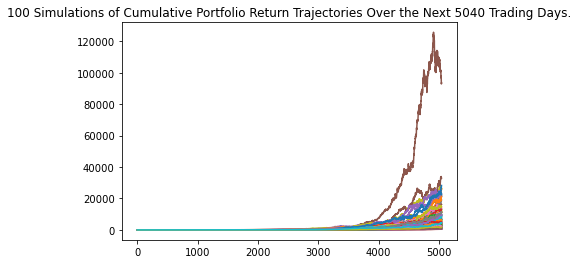

In [19]:
plots = sim_returns.plot_simulation().figure # To depict an image with simulation outcomes
plots.savefig(f'Monte Carlo forecast--{investment_amount} for {investment_period}.png')

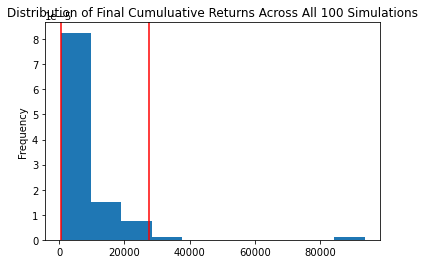

In [20]:
dist_plot = sim_returns.plot_distribution().figure # Plot probability distribution and confidence intervals
dist_plot.savefig(f'Monte Carlo distribution plot--{investment_amount} for {investment_period}.png')

### Investment Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
all_stats = sim_returns.summarize_cumulative_return()

print(all_stats)

count             100.000000
mean             7913.181675
std             11011.946328
min               441.629403
25%              2140.490351
50%              4759.888550
75%              9638.655221
max             93637.466881
95% CI Lower      661.568682
95% CI Upper    27458.585646
Name: 5040, dtype: float64


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on the selected initial investment.

In [22]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
port_high_return = round(investment_amount * all_stats[9],2) 
port_low_return = round(investment_amount * all_stats[8],2)

# Print results
print(f"There is a 95% chance that an initial investment of ${investment_amount} in the portfolio"
      f" over the next {investment_period} years will end within in the range of"
      f" ${port_low_return} and ${port_high_return}")

There is a 95% chance that an initial investment of $15000 in the portfolio over the next 20 years will end within in the range of $9923530.22 and $411878784.69
